In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
import seaborn as sns
#from jupyterthemes import jtplot
#jtplot.style()
#jtplot.style(theme='onedork')
import random
from datetime import datetime
%matplotlib inline
#pylab inline

# Implementacja LFG i generowanie rozkładu normlanego na ich podstawie

seed: [522, 645, 740, 710, 708, 301, 227, 585, 187, 154, 237, 593, 91, 150, 975, 425, 272, 76, 23, 232, 842, 209, 202, 337, 620, 554, 184, 322, 728, 103, 926, 473, 995, 640, 380, 90, 798, 99, 326, 911, 98, 252, 489, 82, 173, 323, 298, 723, 995, 71, 94, 326, 168, 377, 579] seed len: 55 
len abc: 1000000 
sJ: 337 sK: 579


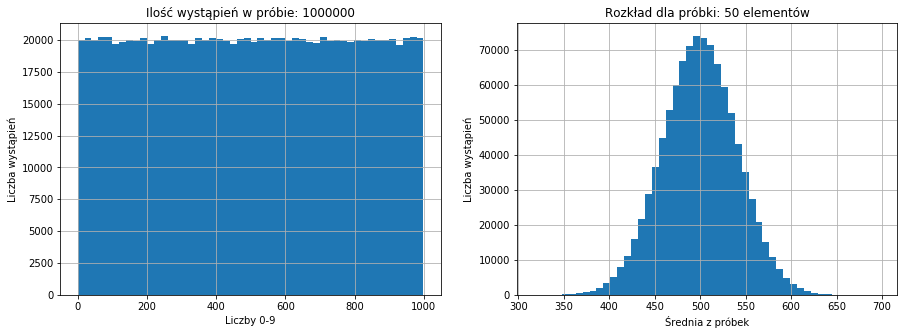

In [40]:
# generowanie liczb losowych na podstawie LFG

LFGpop = 1000000 # wielkość populacji

# losowy wiersz początkowy na podstawie milisekund
millis = int(round(time.time() * 1000000000000000000000000000000000000000000000))
seed = list(map(int, str(millis)))

j = 24
k = 55
s = seed

abc =[]

for n in range(int(LFGpop)):
        op = (s[j-1] + s[k-1]) % 1000 # the pseudorandom output
        abc.append(op)
        s.append(op)
        s.pop(0)

LFGsample = 50 #wielkość próbki
cba = []
x2=0

while x2 < len(abc):
   avg = (sum(random.sample(abc,LFGsample)))/LFGsample
   cba.append( avg )
   x2+=1

# wykresy
plt.rcParams['axes.grid'] = True
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)


ax.hist(abc,bins=50)
ax.title.set_text("Ilość wystąpień w próbie: " + str(LFGpop))
ax.set_ylabel("Liczba wystąpień")
ax.set_xlabel("Liczby 0-9")

ax2.hist(cba,bins=50)
ax2.title.set_text("Rozkład dla próbki: " + str(LFGsample) + " elementów")
ax2.set_ylabel("Liczba wystąpień")
ax2.set_xlabel("Średnia z próbek")

print('seed: ' + str(seed), 'seed len: ' + str(len(seed)), 
      #'\nseed7: ' + str(seed7), 'seed7 len: ' + str(len(seed7)), 
      '\nlen abc: '+str(len(abc)), 
      '\nsJ: ' +str(s[j-1]), 'sK: '+ str(s[k-1]))

# Generowanie liczb losowych Pythona i generowanie rozkładu normalnego na ich podstawie

Text(0.5,0,'Średnia z próbek')

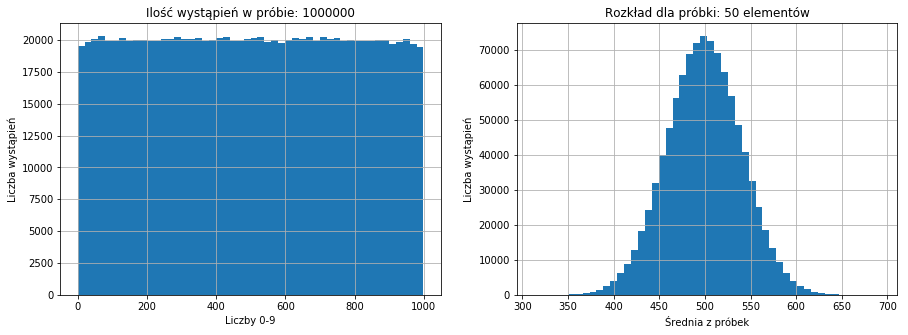

In [39]:
# generowanie liczb losowych Pythona
PythPop= 1000000
mylist = []

for i in range(0,int(PythPop)):
    pyth = round(random.uniform(0,999))
    mylist.append(pyth)

# wybieranie próbek do rozkładu normlanego z listy Pythona

PythSample = 50
cba2 = []
x3=0

while x3 < len(mylist):
   avg = (sum(random.sample(mylist,PythSample )))/PythSample
   cba2.append( avg )
   x3+=1

# wykresy

f = plt.figure(figsize=(15,5))
ax3 = f.add_subplot(121)
ax4 = f.add_subplot(122)

ax3.hist(mylist,bins=50)
ax3.title.set_text("Ilość wystąpień w próbie: " + str(PythPop))
ax3.set_ylabel("Liczba wystąpień")
ax3.set_xlabel("Liczby 0-9")

ax4.hist(cba2,bins=50)
ax4.title.set_text("Rozkład dla próbki: " + str(PythSample) + " elementów")
ax4.set_ylabel("Liczba wystąpień")
ax4.set_xlabel("Średnia z próbek")

# Testowanie rozkładów

T-Student dla niezależnych grup 

In [9]:
from scipy.stats import ttest_ind
from scipy import stats
from scipy.stats import t

In [41]:
# źródło https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/

def independent_ttest(cba, cba2, alpha):
    # calculate means
    mean1, mean2 = mean(cba), mean(cba2)
    # calculate standard errors
    se1, se2 = stats.sem(cba), stats.sem(cba2)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(cba) + len(cba2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

alpha = 0.05
t_stat, df, cv, p = independent_ttest(cba, cba2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
    print('Accept null hypothesis that the means are equal. T_stat <= cv')
else:
    print('Reject the null hypothesis that the means are equal. T_stat > cv')
# interpret via p-value
if p > alpha:
    print('Accept null hypothesis that the means are equal. p > alpha')
else:
    print('Reject the null hypothesis that the means are equal. p <= alpha')

t=6.809, df=1999998, cv=1.645, p=0.000
Reject the null hypothesis that the means are equal. T_stat > cv
Reject the null hypothesis that the means are equal. p <= alpha


# Chisquare

In [42]:
#http://specminor.org/2017/01/08/performing-chi-squared-gof-python.html
from collections import Counter
from scipy.stats import chisquare

abc_np = np.array(abc) # ciąg liczb z LFG
mylist_np = np.array(mylist) # ciąg liczb z pythona

#zliczanie wystapień poszczególnych liczb counterem
abc_count = Counter(abc_np)
mylist_count = Counter(mylist_np)

#zliczanie wystapień poszczególnych liczb numpy'em i tworzenie z nich dictów
unique, counts = np.unique(abc_np, return_counts=True)
abc_dict = dict(zip(unique, counts))

unique, counts = np.unique(mylist_np, return_counts=True)
mylist_dict = dict(zip(unique, counts))

#wyciąganie z dictów wartości
abc_dict_vlist = list(abc_dict.values())
mylist_dict_vlist = list(mylist_dict.values())

#statystyka Chi^2
chisquare(abc_dict_vlist, f_exp=mylist_dict_vlist)

Power_divergenceResult(statistic=5149.0407674129, pvalue=0.0)

In [36]:
#http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-25-chi.html
# robienie z dictów data framów i transpozycja
abc_df = pd.DataFrame.from_dict([abc_dict])
abc_dfT = abc_df.T

mylist_df = pd.DataFrame.from_dict([mylist_dict])
mylist_dfT = mylist_df.T

#nazywanie kolumn
abc_dfT = abc_dfT.rename(columns={0:'count'})
mylist_dfT = mylist_dfT.rename(columns={0:'count'})

#zebranie danych do wzoru na statystykę Chi^2
observed = abc_dfT
mylist_ratio = mylist_dfT/len(mylist_dfT)
expected = mylist_ratio * len(abc_dfT)
chi_squared_stat = (((observed-expected)**2)/expected).sum()

# liczenie p-value
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 9)   # Df = number of variable categories - 1

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=9)

print('Chi^2 stat: ' + str(chi_squared_stat))
print("Critical value :" + str(crit))
print("P value" + str(p_value))
stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected)   # Array of expected counts

Chi^2 stat: count    6589.027247
dtype: float64
Critical value :1072.6058340803268
P value[0.]


Power_divergenceResult(statistic=array([6589.02724735]), pvalue=array([0.]))